<a href="https://colab.research.google.com/github/AYurov28/AYurov28.github.io/blob/main/Dask_parallel_computing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%time
from time import sleep
def inc(x):
  sleep(1)
  return x+1

def add (x, y):
  sleep(1)
  return x+y

x = inc(1)
y = inc (2)
z = add(x,y)
z

CPU times: user 19.4 ms, sys: 2.34 ms, total: 21.7 ms
Wall time: 3 s


5

In [ ]:
%%time
from dask import delayed

@delayed
def inc(x):
  sleep(1)
  return x+1
@delayed
def add(x, y):
  sleep(1)
  return x+y

x = delayed (inc)(1)
y = delayed (inc)(2)
z = delayed (add)(x,y)
z

CPU times: user 1.17 ms, sys: 17 µs, total: 1.19 ms
Wall time: 1.19 ms


Delayed('add-021c98ee-a919-4920-82e7-bc96a9681107')

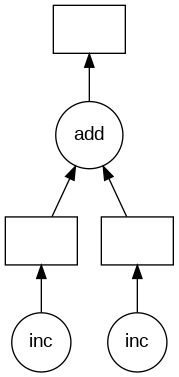

In [ ]:
%%time
from dask import delayed

@delayed
def inc(x):
  sleep(1)
  return x+1
@delayed
def add (x, y):
  sleep(1)
  return x+y

x = delayed (inc)(1)
y = delayed (inc)(2)
z = delayed (add)(x,y)
z.visualize()

In [ ]:
%%time
from dask import delayed

@delayed   # added a decorator
def inc(x):
  sleep(1)
  return x+1
@delayed     # a decorator
def add (x, y):
  sleep(1)
  return x+y

x = delayed (inc)(1)
y = delayed (inc)(2)
z = delayed (add)(x,y)
z.compute()

CPU times: user 11.3 ms, sys: 127 µs, total: 11.5 ms
Wall time: 2 s


5

In [ ]:
%%time 
from time import sleep
data = [1,2,3,4,5,6]
result = []
def inc(x):
  sleep(1)
  return x+1

for i in data:
  result.append(inc(i))

total = sum(result)


CPU times: user 27.5 ms, sys: 2.92 ms, total: 30.4 ms
Wall time: 6.01 s


In [ ]:
#to do calculations in parallel we add a decorator

%%time 
from time import sleep
data = [1,2,3,4,5,6]
result = []
@delayed   # added a decorator
def inc(x):
  sleep(1)
  return x+1

for i in data:
  result.append(delayed(inc)(i)) # added 'delayed'

total = delayed(sum)(result)   # added 'delayed'
total.compute()

CPU times: user 21.6 ms, sys: 5.05 ms, total: 26.7 ms
Wall time: 3.02 s


27

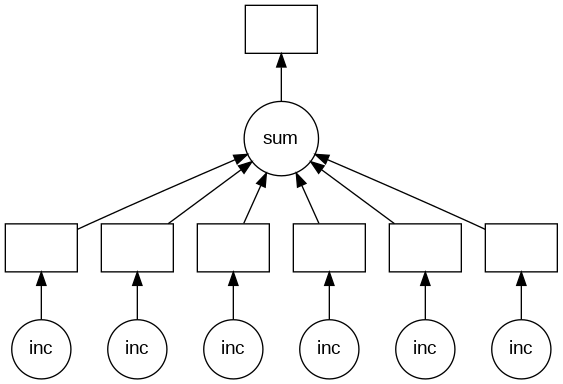

In [ ]:
#to do calculations in parallel we add a decorator
# remove %%time
# add 'total.visualize()'
from time import sleep
data = [1,2,3,4,5,6]
result = []
@delayed   # added a decorator
def inc(x):
  sleep(1)
  return x+1

for i in data:
  result.append(delayed(inc)(i)) # added 'delayed'

total = delayed(sum)(result)   # added 'delayed'
total.visualize()

In [ ]:
from time import sleep

def inc(x):
    sleep(1)
    return x + 1

def add(x, y):
    sleep(1)
    return x + y

In [ ]:
%%time
# Running the functions sequentially

x = inc(1)
y = inc(2)
z = add(x, y)

CPU times: user 14.2 ms, sys: 3.22 ms, total: 17.4 ms
Wall time: 3 s


In [ ]:
from dask import delayed

In [ ]:
%%time
# Running the functions in parallel

x = delayed(inc)(1)
y = delayed(inc)(2)
x_add_y = delayed(add)(x, y)

CPU times: user 834 µs, sys: 0 ns, total: 834 µs
Wall time: 790 µs


In [ ]:
%%time
z = x_add_y.compute()
print(z)

5
CPU times: user 12.6 ms, sys: 2.07 ms, total: 14.6 ms
Wall time: 2.01 s


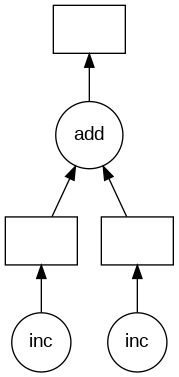

In [ ]:
x_add_y.visualize()

In [ ]:
def double(x):
    sleep(1)
    return 2 * x

def is_even(x):
    return not x % 2

def inc(x):
    sleep(1)
    return x + 1

In [ ]:
%%time
# Sequential code

data = [1,2,3,4,5,6,7,8,9,10]

results = []
for x in data:
    if is_even(x):
        y = double(x)
    else:
        y = inc(x)
    results.append(y)

total = sum(results)
print(total)

90
CPU times: user 43.7 ms, sys: 2.25 ms, total: 45.9 ms
Wall time: 10 s


In [24]:
import dask
import os
import datetime

if not os.path.exists('data'):  # create a directory 'data' with 30 csv files in it. Each file is c.6GB, hence a lot of data in each file
    os.mkdir('data')

def name(i): 
    return str(datetime.date(2000, 1, 1) + i * datetime.timedelta(days=1)) 

df = dask.datasets.timeseries()
df.to_csv('data/*.csv', name_function=name)


['/content/data/2000-01-01.csv',
 '/content/data/2000-01-02.csv',
 '/content/data/2000-01-03.csv',
 '/content/data/2000-01-04.csv',
 '/content/data/2000-01-05.csv',
 '/content/data/2000-01-06.csv',
 '/content/data/2000-01-07.csv',
 '/content/data/2000-01-08.csv',
 '/content/data/2000-01-09.csv',
 '/content/data/2000-01-10.csv',
 '/content/data/2000-01-11.csv',
 '/content/data/2000-01-12.csv',
 '/content/data/2000-01-13.csv',
 '/content/data/2000-01-14.csv',
 '/content/data/2000-01-15.csv',
 '/content/data/2000-01-16.csv',
 '/content/data/2000-01-17.csv',
 '/content/data/2000-01-18.csv',
 '/content/data/2000-01-19.csv',
 '/content/data/2000-01-20.csv',
 '/content/data/2000-01-21.csv',
 '/content/data/2000-01-22.csv',
 '/content/data/2000-01-23.csv',
 '/content/data/2000-01-24.csv',
 '/content/data/2000-01-25.csv',
 '/content/data/2000-01-26.csv',
 '/content/data/2000-01-27.csv',
 '/content/data/2000-01-28.csv',
 '/content/data/2000-01-29.csv',
 '/content/data/2000-01-30.csv']

In [25]:
#Using DASK to Create Multiple Files in Parallel

import pandas as pd
import dask.dataframe as dd

# create pandas dataframe
pandas_df = pd.DataFrame(
    {"odd_num": [1, 3, 5, 7, 9], "even_num": [2, 4, 6, 8, 10]}
)

# set npartitions argument
df = dd.from_pandas(pandas_df, npartitions=2)

# Uncomment the line below if you are using Mac
# df.to_csv("./activity22.1/", index=False)

# Uncomment the line below if you are using Windows
df.to_csv("./activity22_1/", index=False)


['/content/activity22_1/0.part', '/content/activity22_1/1.part']

# New section